## Проект e-learning

In [1]:
import pandas as pd

In [2]:
assessments = pd.read_csv('assessments.csv')
courses = pd.read_csv('courses.csv')
student_assessment = pd.read_csv('studentAssessment.csv')
student_registration = pd.read_csv('studentRegistration.csv')

**assessments.csv** — этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).

**code_module** — идентификационный код предмета.

**code_presentation** — семестр (Идентификационный код).

**id_assessment** — тест (Идентификационный номер ассессмента).

**assessment_type** — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).

**date** — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).

**weight** — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

In [3]:
assessments.head(10)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


**courses.csv** — файл содержит список предметов по семестрам.

**code_module** — предмет (идентификационный код).

**code_presentation** — семестр (идентификационный код).

**module_presentation_length** — продолжительность семестра в днях.

In [4]:
courses.head(10)

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


**studentAssessment.csv** — этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.

**id_assessment** — тест (идентификационный номер).

**id_student** — идентификационный номер студента.

**date_submitted** — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

**is_banked** — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).

**score** — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

In [5]:
student_assessment.head(10)

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
5,1752,45462,20,0,70.0
6,1752,45642,18,0,72.0
7,1752,52130,19,0,72.0
8,1752,53025,9,0,71.0
9,1752,57506,18,0,68.0


**studentRegistration.csv** — этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.

**code_module** — предмет (идентификационный код).

**code_presentation** — семестр (идентификационный код)

**id_student** — идентификационный номер студента.

**date_registration** — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

**date_unregistration** — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

In [6]:
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


______________________________________________________________________________________________________

**1.** Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене)

In [7]:
assessments[assessments.assessment_type == 'Exam']

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [8]:
exams = assessments[assessments.assessment_type == 'Exam'][['code_module', 'code_presentation', 'id_assessment']]

In [9]:
student_assessment.query('score >= 40')

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [10]:
passed_exam = student_assessment.query('score >= 40')[['id_assessment', 'id_student']]

In [11]:
success_exam = exams.merge(passed_exam, how='inner')

In [12]:
success_exam.head(100)

,code_module,code_presentation,id_assessment,id_student
0,CCC,2014B,24290,559706
1,CCC,2014B,24290,559770
2,CCC,2014B,24290,560114
3,CCC,2014B,24290,560311
4,CCC,2014B,24290,560494
...,...,...,...,...
95,CCC,2014B,24290,592961
96,CCC,2014B,24290,592976
97,CCC,2014B,24290,593103
98,CCC,2014B,24290,593305


In [13]:
exams_number = success_exam.groupby('id_student').agg({'id_assessment':'count'}).sort_values(by='id_assessment', ascending=False)
exams_number.head(10)

,id_assessment
id_student,
592093,2
445917,2
543788,2
582879,2
447644,2
571131,2
244738,2
607555,2
2327472,2


In [14]:
exams_number[exams_number.id_assessment == 1].shape

(3802, 1)

3802 студентов успешно сдали только один курс.

__________________________________________________________________________________________________________________________

**2.** Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью. (завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен)

In [15]:
all_exams = exams.merge(student_assessment, how='inner')
all_exams.query('code_module != "DDD"')

,code_module,code_presentation,id_assessment,id_student,date_submitted,is_banked,score
0,CCC,2014B,24290,558914,230,0,32.0
1,CCC,2014B,24290,559706,234,0,78.0
2,CCC,2014B,24290,559770,230,0,54.0
3,CCC,2014B,24290,560114,230,0,64.0
4,CCC,2014B,24290,560311,234,0,100.0
...,...,...,...,...,...,...,...
1910,CCC,2014J,24299,556824,244,0,88.0
1911,CCC,2014J,24299,557650,243,0,66.0
1912,CCC,2014J,24299,557700,248,0,64.0
1913,CCC,2014J,24299,557959,244,0,72.0


In [16]:
high_marks = all_exams.query('score >= 40').groupby(['code_module', 'code_presentation', 'id_assessment']).agg({'id_student':'count'})

In [17]:
high_marks

id_student
code_module code_presentation id_assessment            
CCC         2014B             24290                 664
            2014J             24299                1019
DDD         2013B             25340                 504
            2013J             25354                 878
            2014B             25361                 485
            2014J             25368                 842

In [18]:
all_marks = all_exams.groupby(['code_module', 'code_presentation', 'id_assessment']).agg({'id_student':'count'})

In [19]:
all_marks

id_student
code_module code_presentation id_assessment            
CCC         2014B             24290                 747
            2014J             24299                1168
DDD         2013B             25340                 602
            2013J             25354                 968
            2014B             25361                 524
            2014J             25368                 950

In [20]:
all_marks['final_result'] =  high_marks['id_student'] / all_marks['id_student']

In [21]:
all_marks

id_student  final_result
code_module code_presentation id_assessment                          
CCC         2014B             24290                 747      0.888889
            2014J             24299                1168      0.872432
DDD         2013B             25340                 602      0.837209
            2013J             25354                 968      0.907025
            2014B             25361                 524      0.925573
            2014J             25368                 950      0.886316

DDD 2014B - самая высокая завершаемость.
DDD 2013B - самая низкая завершаемость.

_____________________________________________________________________________________________________________________

**3.** По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом). 

In [22]:
exams_dates = pd.merge(exams, student_assessment, how='inner')
exams_dates.head()

,code_module,code_presentation,id_assessment,id_student,date_submitted,is_banked,score
0,CCC,2014B,24290,558914,230,0,32.0
1,CCC,2014B,24290,559706,234,0,78.0
2,CCC,2014B,24290,559770,230,0,54.0
3,CCC,2014B,24290,560114,230,0,64.0
4,CCC,2014B,24290,560311,234,0,100.0


In [23]:
max_dates = exams_dates.query('score >= 40').groupby(['code_module', 'id_student'], as_index=False).agg({'date_submitted':'max'})
max_dates.head()

,code_module,id_student,date_submitted
0,CCC,23698,243
1,CCC,27116,243
2,CCC,28787,243
3,CCC,29420,244
4,CCC,29639,248


In [24]:
max_dates.query('code_module == "CCC"').date_submitted.mean()

239.34521687462865

In [25]:
max_dates.query('code_module == "DDD"').date_submitted.mean()

237.97856614929785

In [26]:
print('Средний срок сдачи по предмету CCC: ', round(239.34521687462865, 2), '\nСредний срок сдачи по предмету DDD: ', 
     round(237.97856614929785, 2))

Средний срок сдачи по предмету CCC:  239.35 
Средний срок сдачи по предмету DDD:  237.98


_____________________________________________________________________________________________________

**4.** Выяви самые популярные курсы (ТОП-3) по количеству регистраций на них. А также курсы с самым большим оттоком (ТОП-3). (8 баллов)

In [27]:
cancelled_courses_courses = student_registration[student_registration.date_unregistration.isna()]
cancelled_courses_courses.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
5,AAA,2013J,38053,-110.0,NaN


In [28]:
interrupted_courses = student_registration[student_registration.date_unregistration.isna() == False]
interrupted_courses.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
2,AAA,2013J,30268,-92.0,12.0
15,AAA,2013J,65002,-180.0,96.0
22,AAA,2013J,94961,-170.0,72.0
29,AAA,2013J,106247,5.0,175.0
41,AAA,2013J,129955,-197.0,135.0


In [29]:
student_registration.groupby('code_module', as_index=False) \
                    .agg({'id_student':'count'}) \
                    .sort_values(by='id_student', ascending=False)

,code_module,id_student
1,BBB,7909
5,FFF,7762
3,DDD,6272
2,CCC,4434
4,EEE,2934
6,GGG,2534
0,AAA,748


In [30]:
interrupted_courses.groupby('code_module', as_index=False) \
                    .agg({'id_student':'count'}) \
                    .sort_values(by='id_student', ascending=False)

,code_module,id_student
5,FFF,2380
1,BBB,2377
3,DDD,2235
2,CCC,1947
4,EEE,718
6,GGG,289
0,AAA,126


Популярные курсы (ТОП-3) по количеству регистраций: BBB, FFF, DDD. \
Курсы с самым большим оттоком (ТОП-3): FFF, BBB, DDD

______________________________________________________________________________________________________

**5.** Напиши функцию на python, позволяющую строить когортный (семестровый) анализ. В период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов. 

Признак формирования когорты — действие, которое объединяет людей в группу: первый визит, покупка, установка, регистрация и т.п. **Сдача экзамена.** \
Размер когорты — временной интервал: день, неделя, месяц. **Семестр.** \
Отчетный период — время исследования поведения групп. **С 2013 по 2014 гг.** \
Анализируемый ключевой показатель: ROI, Retention Rate, LTV и т.д. **Завершаемость**.

In [31]:
assessments.head(10)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


In [32]:
semester_table = assessments.merge(student_assessment, how='inner')
semester_table = semester_table[['code_presentation', 'id_student', 'date_submitted', 'score']]
semester_table

,code_presentation,id_student,date_submitted,score
0,2013J,11391,18,78.0
1,2013J,28400,22,70.0
2,2013J,31604,17,72.0
3,2013J,32885,26,69.0
4,2013J,38053,19,79.0
...,...,...,...,...
173907,2014J,652462,172,60.0
173908,2014J,652539,176,75.0
173909,2014J,653157,187,70.0
173910,2014J,653252,171,70.0


In [33]:
mean_semester = semester_table.groupby('code_presentation') \
                .agg({'date_submitted':'mean'})
mean_semester

,date_submitted
code_presentation,
2013B,111.328554
2013J,119.857195
2014B,114.034605
2014J,116.979607


In [34]:
semester_score_forty = semester_table[semester_table.score >= 40].groupby('code_presentation', as_index=False) \
        .agg({'score':'count'})
semester_score_forty

,code_presentation,score
0,2013B,32306
1,2013J,47480
2,2014B,37068
3,2014J,49307


In [35]:
semester_score_all = semester_table.groupby('code_presentation', as_index=False) \
        .agg({'score':'count'})
semester_score_all

,code_presentation,score
0,2013B,33776
1,2013J,48982
2,2014B,38849
3,2014J,52132


In [36]:
semester_score_completion = semester_score_forty.merge(semester_score_all, how='inner', on='code_presentation')
semester_score_completion['completion'] = semester_score_completion.score_x / semester_score_completion.score_y
semester_score_completion = semester_score_completion[['code_presentation', 'completion']]
semester_score_completion

,code_presentation,completion
0,2013B,0.956478
1,2013J,0.969336
2,2014B,0.954156
3,2014J,0.945811


In [37]:
semester_final = mean_semester.merge(semester_score_completion, how='inner', on='code_presentation')
semester_final

,code_presentation,date_submitted,completion
0,2013B,111.328554,0.956478
1,2013J,119.857195,0.969336
2,2014B,114.034605,0.954156
3,2014J,116.979607,0.945811


In [38]:
def cohort_analysis(assessments, student_assessment):
    semester_table = assessments.merge(student_assessment, how='inner')
    semester_table = semester_table[['code_presentation', 'id_student', 'date_submitted', 'score']]
    # сгруппируем данные по семестрам и найдём средние сроки сдачи курсов
    mean_semester = semester_table.groupby('code_presentation') \
                .agg({'date_submitted':'mean'})
    mean_semester = mean_semester.rename(columns={'date_submitted':'mean_date'})
    # чтобы найти завершаемость курсов, посчитаем количество успешно сданных тестов (>= 40 баллов)
    # и количество всех попыток сдать тесты
    semester_score_forty = semester_table[semester_table.score >= 40].groupby('code_presentation', as_index=False) \
        .agg({'score':'count'})
    semester_score_all = semester_table.groupby('code_presentation', as_index=False) \
        .agg({'score':'count'})
    semester_score_completion = semester_score_forty.merge(semester_score_all, how='inner', on='code_presentation')
    # найдём завершаемость (отношение успешно сданных тестов к количеству всех попыток сдать их)
    semester_score_completion['completion'] = semester_score_completion.score_x / semester_score_completion.score_y
    semester_score_completion = semester_score_completion[['code_presentation', 'completion']]
    # объединим данные по средним срокам и завершаемости в одну таблицу
    semester_final = mean_semester.merge(semester_score_completion, how='inner', on='code_presentation')
    return semester_final

In [39]:
print(cohort_analysis(assessments, student_assessment))

  code_presentation   mean_date  completion
0             2013B  111.328554    0.956478
1             2013J  119.857195    0.969336
2             2014B  114.034605    0.954156
3             2014J  116.979607    0.945811


_________________________________________________________________________________________________

**6.** Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 0.1 до 0.5, monetary от 55 до 72 баллов.

In [40]:
# пусть R - среднее время, за которое студент сдает тест
#       F - успешность сдач тестов (отношение сданных тестов ко всем попыткам)
#       M - среднее количество баллов, получаемое за тесты

In [41]:
import numpy as np
import seaborn as sns
from datetime import datetime as dt, timedelta
from matplotlib import pyplot as plt

In [42]:
student_assessment.head(10)

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
5,1752,45462,20,0,70.0
6,1752,45642,18,0,72.0
7,1752,52130,19,0,72.0
8,1752,53025,9,0,71.0
9,1752,57506,18,0,68.0


In [43]:
assessments.head(10)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


In [44]:
# объединим таблицы assessment и student_assessment
merged_student_assessment = assessments.merge(student_assessment, how='inner')

In [45]:
merged_student_assessment.head(10)

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0
5,AAA,2013J,1752,TMA,19.0,10.0,45462,20,0,70.0
6,AAA,2013J,1752,TMA,19.0,10.0,45642,18,0,72.0
7,AAA,2013J,1752,TMA,19.0,10.0,52130,19,0,72.0
8,AAA,2013J,1752,TMA,19.0,10.0,53025,9,0,71.0
9,AAA,2013J,1752,TMA,19.0,10.0,57506,18,0,68.0


In [46]:
# оставим только данные по идентификационному номеру студентов, дате сдачи теста, оценке за тест
student_assessment_rmf = merged_student_assessment[['id_student', 'date_submitted', 'score']]

In [47]:
student_assessment_rmf

,id_student,date_submitted,score
0,11391,18,78.0
1,28400,22,70.0
2,31604,17,72.0
3,32885,26,69.0
4,38053,19,79.0
...,...,...,...
173907,652462,172,60.0
173908,652539,176,75.0
173909,653157,187,70.0
173910,653252,171,70.0


In [48]:
# убедимся, что в данных есть студенты, сдававшие более 1 теста (173912 тестов > 23369)
student_assessment_rmf.id_student.nunique()

23369

In [49]:
# уберем результаты с нулевой оценкой
student_assessment_rmf = student_assessment_rmf[student_assessment_rmf.score > 0]

In [50]:
student_assessment_rmf

,id_student,date_submitted,score
0,11391,18,78.0
1,28400,22,70.0
2,31604,17,72.0
3,32885,26,69.0
4,38053,19,79.0
...,...,...,...
173907,652462,172,60.0
173908,652539,176,75.0
173909,653157,187,70.0
173910,653252,171,70.0


In [51]:
# сгруппируем результаты каждого студента, найдем их средний балл и среднее время сдачи теста
rfm_table = student_assessment_rmf.groupby('id_student', as_index = False).agg({'score': 'mean',
                                                                  'date_submitted':'mean'})

In [52]:
rfm_table

,id_student,score,date_submitted
0,6516,61.800000,111.600000
1,8462,87.000000,23.000000
2,11391,82.000000,112.400000
3,23629,82.500000,55.750000
4,23698,74.444444,133.444444
...,...,...,...
23322,2698251,58.142857,121.428571
23323,2698257,67.800000,116.200000
23324,2698535,39.250000,90.375000
23325,2698577,64.400000,106.200000


In [53]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<AxesSubplot:xlabel='date_submitted', ylabel='Density'>

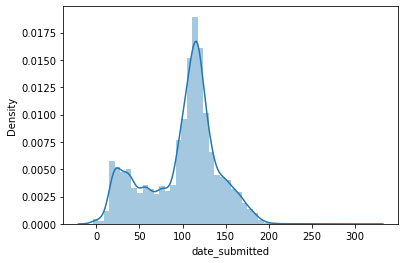

In [54]:
# рассмотрим распределение Recency
sns.distplot(rfm_table['date_submitted'])

In [55]:
# скоры для Recency
def recency_score(recency):
    if recency <= 70:
        return 3
    elif (recency > 70) and (recency <= 150):
        return 2 
    else:
        return 1
    
rfm_table['recency'] = rfm_table['date_submitted'].apply(recency_score)

<AxesSubplot:xlabel='score', ylabel='Density'>

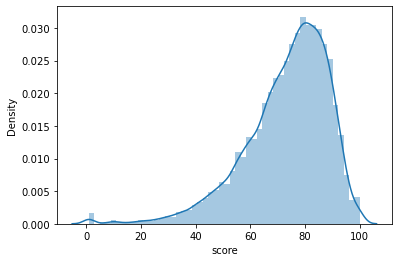

In [56]:
# рассмотрим распределение Monetary
sns.distplot(rfm_table['score'])

In [57]:
# скоры для Monetary
def monetary_score(monetary):
    if monetary >= 80:
        return 3
    elif (monetary < 80) and (monetary >= 40):
        return 2 
    else:
        return 1
    
rfm_table['monetary'] = rfm_table['score'].apply(monetary_score)

In [58]:
rfm_table.head(20)

,id_student,score,date_submitted,recency,monetary
0,6516,61.800000,111.600000,2,2
1,8462,87.000000,23.000000,3,3
2,11391,82.000000,112.400000,2,3
3,23629,82.500000,55.750000,3,3
4,23698,74.444444,133.444444,2,2
5,23798,93.909091,120.454545,2,3
6,24186,62.500000,160.625000,1,2
7,24213,76.285714,125.714286,2,2
8,24391,88.888889,152.777778,1,3
9,24734,46.800000,121.600000,2,2


In [59]:
# чтобы найти Frequency, найдём для каждого студента количество тестов, сданных на более чем 40 баллов,
# и общее количество сданных тестов
merged_student_assessment

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0
...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,37437,TMA,173.0,0.0,652462,172,0,60.0
173908,GGG,2014J,37437,TMA,173.0,0.0,652539,176,0,75.0
173909,GGG,2014J,37437,TMA,173.0,0.0,653157,187,0,70.0
173910,GGG,2014J,37437,TMA,173.0,0.0,653252,171,0,70.0


In [60]:
above_forty = merged_student_assessment[merged_student_assessment.score >= 40].groupby('id_student', as_index=False) \
                                                                .agg({'score':'count'})
above_forty = above_forty.rename(columns={'score':'scores_above_forty'})
above_forty

,id_student,scores_above_forty
0,6516,5
1,8462,7
2,11391,5
3,23629,4
4,23698,9
...,...,...
22968,2698251,6
22969,2698257,5
22970,2698535,4
22971,2698577,5


In [61]:
all_scores = merged_student_assessment.groupby('id_student', as_index=False) \
                         .agg({'score':'count'})
all_scores = all_scores.rename(columns={'score':'all_scores'})
all_scores

,id_student,all_scores
0,6516,5
1,8462,7
2,11391,5
3,23629,4
4,23698,9
...,...,...
23364,2698251,7
23365,2698257,5
23366,2698535,8
23367,2698577,5


In [62]:
# объединим полученные результаты и найдем успешность сдач тестов (completion)
completion_table = all_scores.merge(above_forty, how='outer')
completion_table = completion_table.fillna(0)
completion_table['completion'] = completion_table.scores_above_forty / completion_table.all_scores
completion_table

,id_student,all_scores,scores_above_forty,completion
0,6516,5,5.0,1.000000
1,8462,7,7.0,1.000000
2,11391,5,5.0,1.000000
3,23629,4,4.0,1.000000
4,23698,9,9.0,1.000000
...,...,...,...,...
23364,2698251,7,6.0,0.857143
23365,2698257,5,5.0,1.000000
23366,2698535,8,4.0,0.500000
23367,2698577,5,5.0,1.000000


<AxesSubplot:xlabel='completion', ylabel='Density'>

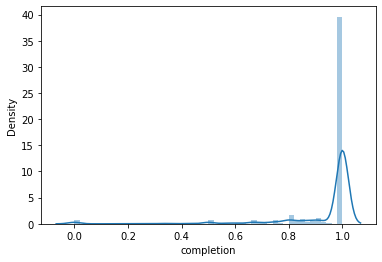

In [63]:
sns.distplot(completion_table['completion'])

In [64]:
# скоры для Frequency
def frequency_score(frequency):
    if frequency >= 0.9:
        return 3
    elif (frequency < 0.9) and (frequency >= 0.6):
        return 2 
    else:
        return 1
    
rfm_table['frequency'] = completion_table['completion'].apply(frequency_score)

In [65]:
# объединим студентов в сегменты по полученным скорам
rfm_table['rfm_segment'] = rfm_table.apply(lambda x: int(str(int(x['recency'])) + str(int(x['frequency'])) + str(int(x['monetary']))),
                                           axis = 1)

In [66]:
rfm_table.head()

,id_student,score,date_submitted,recency,monetary,frequency,rfm_segment
0,6516,61.800000,111.600000,2,2,3,232
1,8462,87.000000,23.000000,3,3,3,333
2,11391,82.000000,112.400000,2,3,3,233
3,23629,82.500000,55.750000,3,3,3,333
4,23698,74.444444,133.444444,2,2,3,232


<AxesSubplot:xlabel='count', ylabel='rfm_segment'>

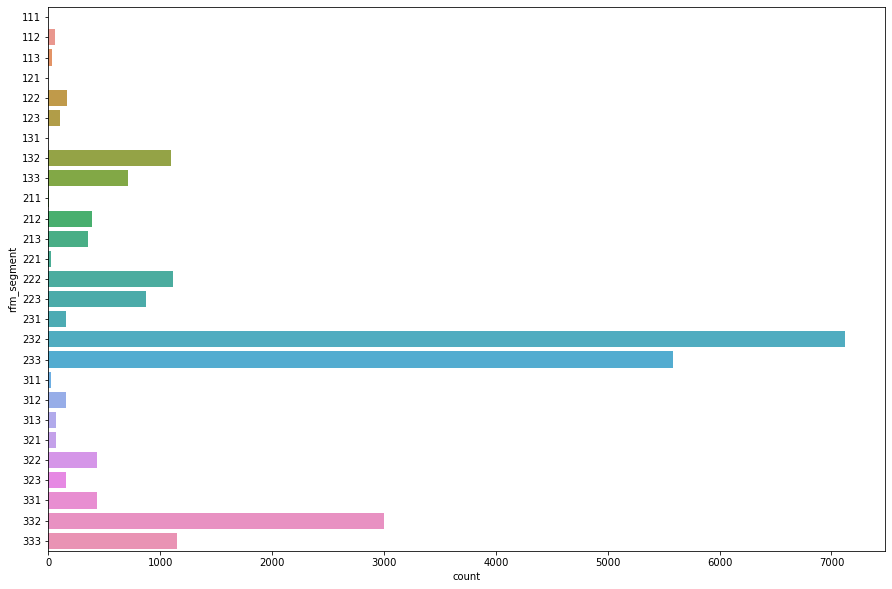

In [67]:
plt.figure(figsize=(15,10))
sns.countplot(y=rfm_table['rfm_segment'])

Наибольшее количество студентов составило следующие RFM-сегменты:<br> 
**232 (recency = 2, frequency = 3, monetary = 2)**: 2 - в среднем тратили от 70 до 150 дней на сдачу теста, 3 - успешность сдачи курсов для них составила более 90%, 2 - в среднем они получали за тест от 40 до 80 баллов; <br>
**233 (recency = 2, frequency = 3, monetary = 3)**: 2 - в среднем тратили от 70 до 150 дней на сдачу теста, 3 - успешность сдачи курсов для них составила более 90%, 3 - в среднем они получали за тест более 80 баллов. <br>
Наименьшие сегменты: **311 (recency = 3, frequency = 1, monetary = 1)**, **221 (recency = 2, frequency = 2, monetary = 1)**, **113 (recency = 1, frequency = 1, monetary = 3)**.